In [106]:
# import libraries
import pandas as pd
# !pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
# !pip install plotly
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
# from pandas_profiling import ProfileReport
from pandas.plotting import scatter_matrix
#!pip install pm4py
import pm4py
from pm4py.objects.log.util.log import project_traces
from pm4py.objects.log.util import interval_lifecycle
# !pip install zipfile
import zipfile

#!pip install warnings
import warnings
warnings.filterwarnings("ignore")

## Resume here

In [107]:
# load back
data = pd.read_csv('../data/bpi_challenge_offer.csv', sep=',')
# data.head()
trace = pm4py.format_dataframe(data, case_id='Case ID', activity_key='Activity', timestamp_key="Start Timestamp")

trace.head()

,Case ID,Activity,Resource,Start Timestamp,Complete Timestamp,Variant,Variant index,lifecycle:transition,EventOrigin,EventID,...,MonthlyCost,Selected,CreditScore,OfferedAmount,OfferID,case:concept:name,concept:name,time:timestamp,@@index,@@case_index
0,Application_1000086665,A_Create Application,User_1,2016-08-03 17:57:21.673000+00:00,2016-08-03 17:57:21.673000+00:00,Variant 2,2,complete,Application,Application_1000086665,...,NaN,NaN,NaN,NaN,NaN,Application_1000086665,A_Create Application,2016-08-03 17:57:21.673000+00:00,0,0
1,Application_1000086665,A_Submitted,User_1,2016-08-03 17:57:21.734000+00:00,2016-08-03 17:57:21.734000+00:00,Variant 2,2,complete,Application,ApplState_161925113,...,NaN,NaN,NaN,NaN,NaN,Application_1000086665,A_Submitted,2016-08-03 17:57:21.734000+00:00,1,0
2,Application_1000086665,A_Concept,User_1,2016-08-03 17:58:28.299000+00:00,2016-08-03 17:58:28.299000+00:00,Variant 2,2,complete,Application,ApplState_385184570,...,NaN,NaN,NaN,NaN,NaN,Application_1000086665,A_Concept,2016-08-03 17:58:28.299000+00:00,2,0
3,Application_1000086665,A_Accepted,User_5,2016-08-05 15:57:07.419000+00:00,2016-08-05 15:57:07.419000+00:00,Variant 2,2,complete,Application,ApplState_856156982,...,NaN,NaN,NaN,NaN,NaN,Application_1000086665,A_Accepted,2016-08-05 15:57:07.419000+00:00,3,0
4,Application_1000086665,O_Create Offer,User_5,2016-08-05 15:59:57.320000+00:00,2016-08-05 15:59:57.320000+00:00,Variant 2,2,complete,Offer,Offer_410892064,...,241.28,False,0.0,5000.0,Offer_410892064,Application_1000086665,O_Create Offer,2016-08-05 15:59:57.320000+00:00,4,0


In [108]:
trace['year'] = pd.DatetimeIndex(trace['Start Timestamp']).year
trace['month'] = pd.DatetimeIndex(trace['Start Timestamp']).month
trace.head()
trace_log = pm4py.convert_to_event_log(trace)

In [109]:
# To extract target varaible, 
# if event starts with the name decleration rejected it is considered as rejected application
accepted = []
for trace in trace_log:
    flag = False
    for i,event in enumerate(trace):
        if "O_Accepted" in event['concept:name']:
            flag = True
            break
    
    if flag:
        accepted.append(1)
    else:
        accepted.append(0)

In [110]:
# convert logs to dataframe
df = pm4py.convert_to_dataframe(trace_log)
df.head(25)

,Case ID,Activity,Resource,Start Timestamp,Complete Timestamp,Variant,Variant index,lifecycle:transition,EventOrigin,EventID,...,CreditScore,OfferedAmount,OfferID,concept:name,time:timestamp,@@index,@@case_index,year,month,case:concept:name
0,Application_1000086665,A_Create Application,User_1,2016-08-03 17:57:21.673000+00:00,2016-08-03 17:57:21.673000+00:00,Variant 2,2,complete,Application,Application_1000086665,...,NaN,NaN,NaN,A_Create Application,2016-08-03 17:57:21.673000+00:00,0,0,2016,8,Application_1000086665
1,Application_1000086665,A_Submitted,User_1,2016-08-03 17:57:21.734000+00:00,2016-08-03 17:57:21.734000+00:00,Variant 2,2,complete,Application,ApplState_161925113,...,NaN,NaN,NaN,A_Submitted,2016-08-03 17:57:21.734000+00:00,1,0,2016,8,Application_1000086665
2,Application_1000086665,A_Concept,User_1,2016-08-03 17:58:28.299000+00:00,2016-08-03 17:58:28.299000+00:00,Variant 2,2,complete,Application,ApplState_385184570,...,NaN,NaN,NaN,A_Concept,2016-08-03 17:58:28.299000+00:00,2,0,2016,8,Application_1000086665
3,Application_1000086665,A_Accepted,User_5,2016-08-05 15:57:07.419000+00:00,2016-08-05 15:57:07.419000+00:00,Variant 2,2,complete,Application,ApplState_856156982,...,NaN,NaN,NaN,A_Accepted,2016-08-05 15:57:07.419000+00:00,3,0,2016,8,Application_1000086665
4,Application_1000086665,O_Create Offer,User_5,2016-08-05 15:59:57.320000+00:00,2016-08-05 15:59:57.320000+00:00,Variant 2,2,complete,Offer,Offer_410892064,...,0.0,5000.0,Offer_410892064,O_Create Offer,2016-08-05 15:59:57.320000+00:00,4,0,2016,8,Application_1000086665
5,Application_1000086665,O_Created,User_5,2016-08-05 15:59:58.162000+00:00,2016-08-05 15:59:58.162000+00:00,Variant 2,2,complete,Offer,OfferState_2071773136,...,0.0,5000.0,Offer_410892064,O_Created,2016-08-05 15:59:58.162000+00:00,5,0,2016,8,Application_1000086665
6,Application_1000086665,O_Sent (mail and online),User_5,2016-08-05 16:01:23.264000+00:00,2016-08-05 16:01:23.264000+00:00,Variant 2,2,complete,Offer,OfferState_388269514,...,0.0,5000.0,Offer_410892064,O_Sent (mail and online),2016-08-05 16:01:23.264000+00:00,6,0,2016,8,Application_1000086665
7,Application_1000086665,A_Complete,User_5,2016-08-05 16:01:23.288000+00:00,2016-08-05 16:01:23.288000+00:00,Variant 2,2,complete,Application,ApplState_1103800866,...,NaN,NaN,NaN,A_Complete,2016-08-05 16:01:23.288000+00:00,7,0,2016,8,Application_1000086665
8,Application_1000086665,A_Cancelled,User_1,2016-09-05 08:00:36.710000+00:00,2016-09-05 08:00:36.710000+00:00,Variant 2,2,complete,Application,ApplState_544389273,...,NaN,NaN,NaN,A_Cancelled,2016-09-05 08:00:36.710000+00:00,8,0,2016,9,Application_1000086665
9,Application_1000086665,O_Cancelled,User_1,2016-09-05 08:00:36.829000+00:00,2016-09-05 08:00:36.829000+00:00,Variant 2,2,complete,Offer,OfferState_1258287612,...,0.0,5000.0,Offer_410892064,O_Cancelled,2016-09-05 08:00:36.829000+00:00,9,0,2016,9,Application_1000086665


In [112]:
# categoric data
# keeping only low cardinality values
cat_columns = df.select_dtypes(include='object')
cat_columns = cat_columns[['Accepted', 'Selected', 'LoanGoal', 'ApplicationType']]
cat_columns.head()

# numeric data
num_columns = df.select_dtypes(include='float64')
num_columns = num_columns[['RequestedAmount', 'FirstWithdrawalAmount', 'NumberOfTerms', 'MonthlyCost', 'CreditScore', 'OfferedAmount']]
num_columns.head()
cat_columns.shape, num_columns.shape

((147724, 4), (147724, 6))

In [113]:
filtered_rows = df[df['EventOrigin'] == 'Offer']
num_columns = filtered_rows.select_dtypes(include='number')
num_columns.columns
len(filtered_rows)

58989

# Visualizations

In [ ]:
import plotly.graph_objects as go

# Assuming num_columns is a DataFrame with the numerical columns you want to plot

for variable in num_columns.columns:
    fig = go.Figure()

    box = go.Box(y=num_columns[variable], name=variable)
    fig.add_trace(box)

    fig.update_layout(
        xaxis_title='Variable',
        yaxis_title='Value',
        title=f"Box Plot for {variable}",
        showlegend=False,  # Set to True if you want to show a legend
        autosize=True,
        width=300,
        height=600,
        margin=dict(l=50, r=50, b=100, t=100, pad=4),
        paper_bgcolor="white"
    )
    # Save the figure as a PNG file using Kaleido engine
    #file_name = f"boxplot2_{variable}.png"
    #pio.write_image(fig, file_name, engine='kaleido')

#    print(f"Saved {file_name}")
#    fig.show()


In [ ]:
### Save the figures
#import plotly.graph_objects as go
#import plotly.io as pio

#for variable in num_columns.columns:
#    fig = go.Figure()

#    box = go.Box(y=num_columns[variable], name=variable)
#    fig.add_trace(box)

#    fig.update_layout(
#        xaxis_title='Variable',
#        yaxis_title='Value',
#        title=f"Box Plot for {variable}",
#        showlegend=False,  # Set to True if you want to show a legend
#        autosize=False,
#        width=800,
#        height=600,
#        margin=dict(l=50, r=50, b=100, t=100, pad=4),
#        paper_bgcolor="lightgray",
#    )

    # Save the figure as a PNG file using Kaleido engine
#    file_name = f"boxplot_{variable}.png"
#    pio.write_image(fig, file_name, engine='kaleido')

#    print(f"Saved {file_name}")


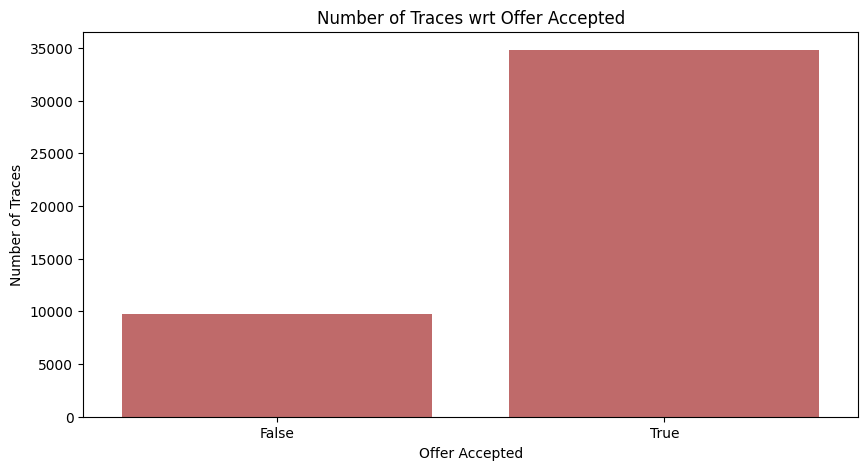

In [ ]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot()
temp = filtered_rows['Accepted'].value_counts()
grid = sns.barplot(x=temp.index, y=temp.values, color ='indianred')


ax.set_xlabel("Offer Accepted")  # set x-axis label
ax.set_ylabel("Number of Traces") # set y-axis label
plt.title('Number of Traces wrt Offer Accepted')
plt.savefig("Number of Traces wrt Offer Accepted.png")

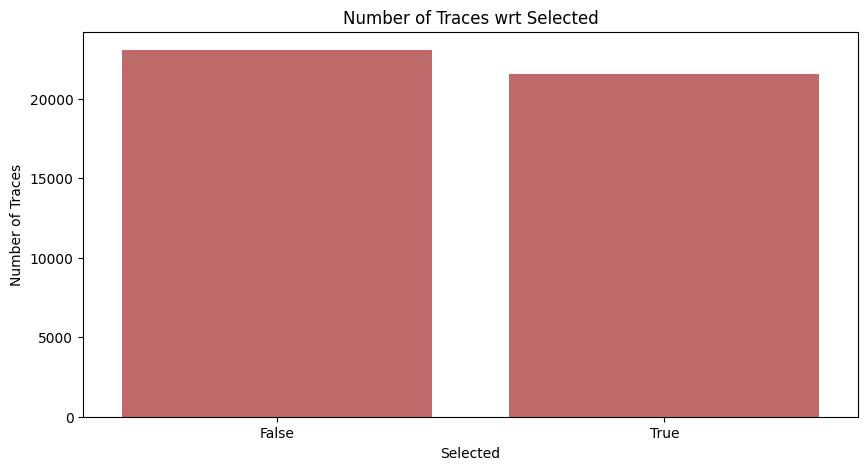

In [ ]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot()
temp = filtered_rows['Selected'].value_counts()
grid = sns.barplot(x=temp.index, y=temp.values, color ='indianred')


ax.set_xlabel("Selected")  # set x-axis label
ax.set_ylabel("Number of Traces") # set y-axis label
plt.title('Number of Traces wrt Selected')
plt.savefig("Number of Traces wrt Selected.png")

Text(0.5, 1.0, 'Heatmap')

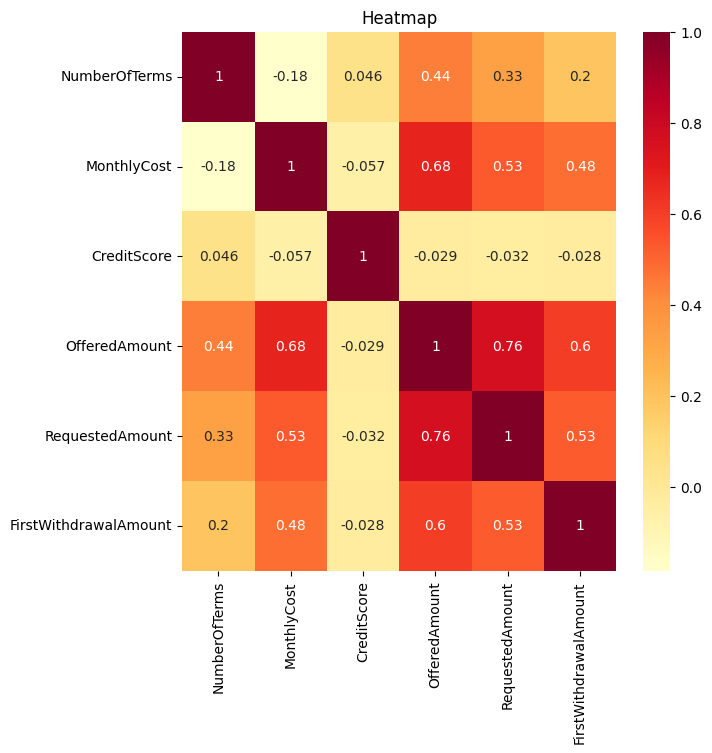

In [ ]:
# subset of num variables
selected_variables = ['NumberOfTerms', 'MonthlyCost', 'CreditScore', 'OfferedAmount', 'RequestedAmount', 'FirstWithdrawalAmount']
# Select only the specified variables from num_columns
selected_num_columns = num_columns[selected_variables]

# plotting heat map between numeric variables
fig, ax = plt.subplots(figsize=(7,7)) 
sns.heatmap(selected_num_columns.corr(), annot=True, ax = ax, cmap='YlOrRd')
plt.title('Heatmap')
#plt.savefig("Feature_Heatmap.png")     already saved

array([[<Axes: title={'center': 'RequestedAmount'}>,
        <Axes: title={'center': 'FirstWithdrawalAmount'}>],
       [<Axes: title={'center': 'NumberOfTerms'}>,
        <Axes: title={'center': 'MonthlyCost'}>],
       [<Axes: title={'center': 'CreditScore'}>,
        <Axes: title={'center': 'OfferedAmount'}>]], dtype=object)

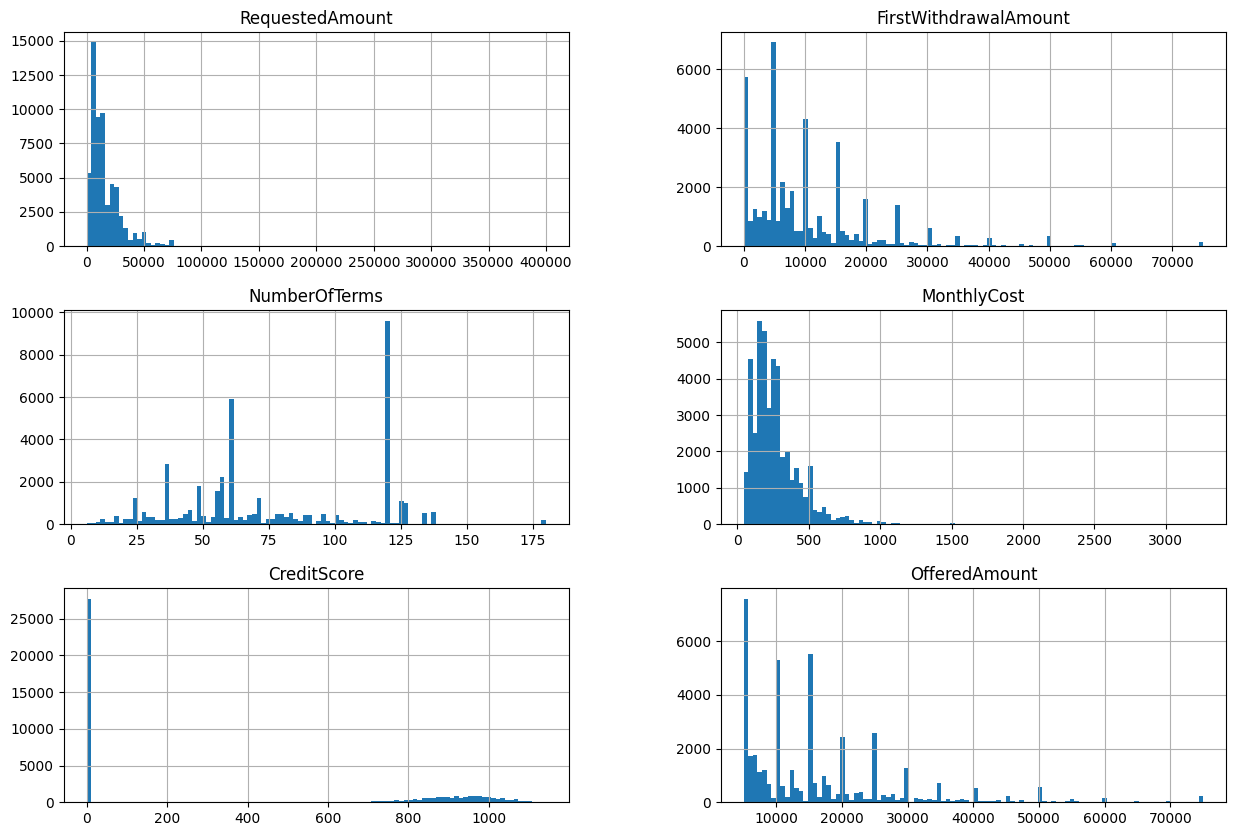

In [ ]:
selected_variables = ['RequestedAmount', 'FirstWithdrawalAmount', 'NumberOfTerms', 'MonthlyCost', 'CreditScore', 'OfferedAmount']
selected_num_columns = num_columns[selected_variables]
selected_num_columns.hist(figsize=(15,10), bins=100)


Text(0, 0.5, 'Number of Traces')

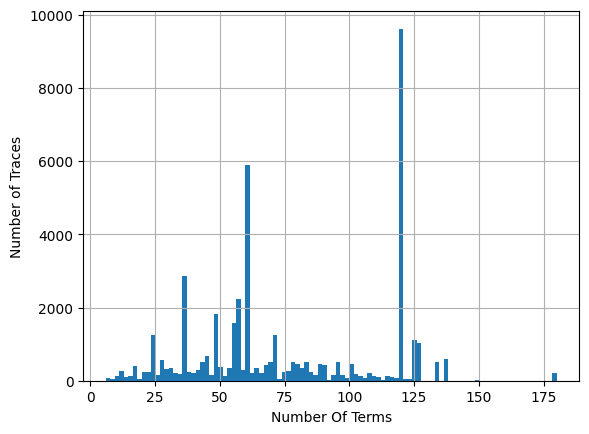

In [ ]:
# labeled axis hist of NumberOfTerms
selected_num_columns['NumberOfTerms'].hist(bins=100)
plt.xlabel('Number Of Terms')
plt.ylabel('Number of Traces')

In [1]:
# import numpy as np
# import pandas as pd

# # Assuming selected_num_columns is a DataFrame with the 'MonthlyCost' column

# # Example data (replace this with your actual data)
# monthly_cost_data = selected_num_columns['MonthlyCost']

# # Calculate the interquartile range (IQR)
# q1 = np.nanpercentile(monthly_cost_data, 25)
# q3 = np.nanpercentile(monthly_cost_data, 75)
# iqr = q3 - q1

# # Filter values within the IQR
# values_within_iqr = monthly_cost_data[(monthly_cost_data >= q1) & (monthly_cost_data <= q3)]

# # Compute the mean of values within the IQR
# mean_within_iqr = np.nanmean(values_within_iqr)

# print("Interquartile Range (IQR) for MonthlyCost:", iqr)
# print("Values within IQR for MonthlyCost:", values_within_iqr.tolist())
# print("Mean within IQR for MonthlyCost:", mean_within_iqr)


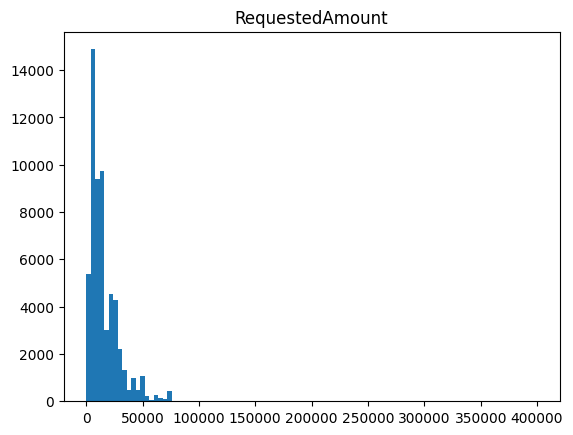

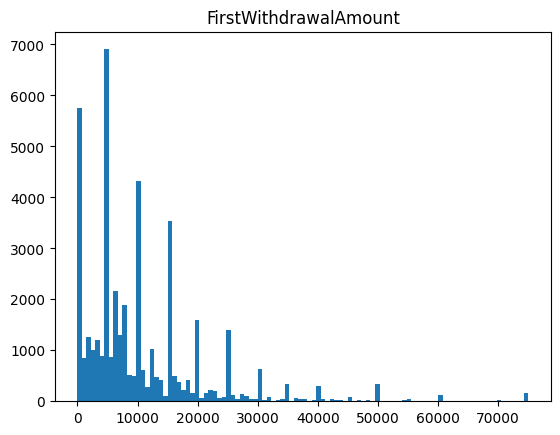

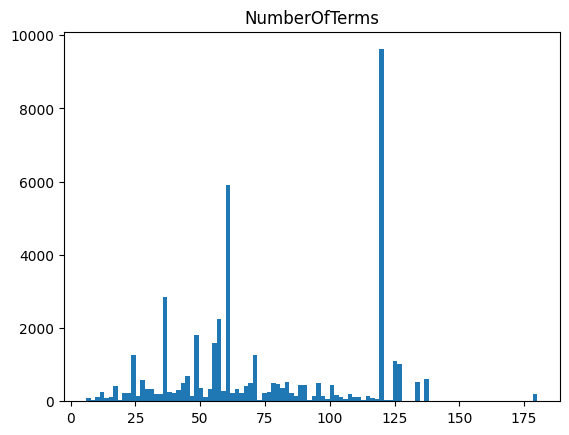

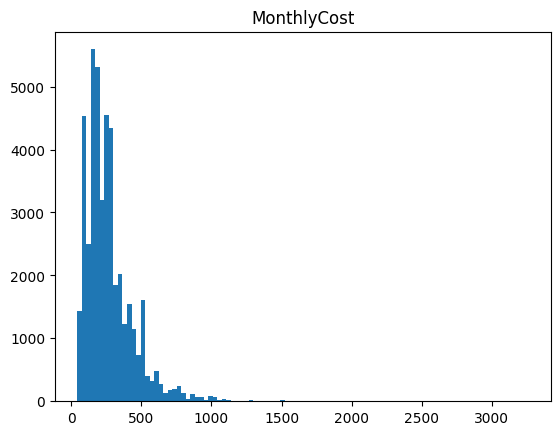

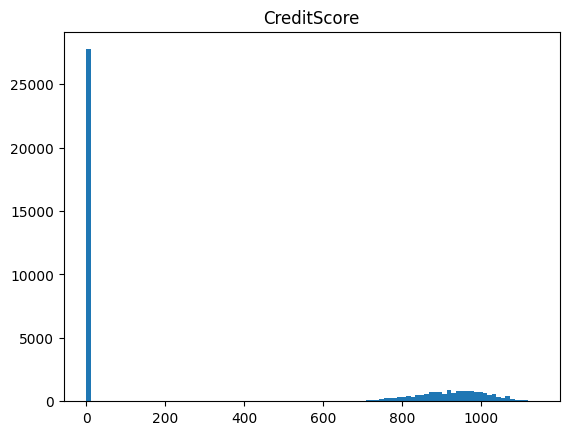

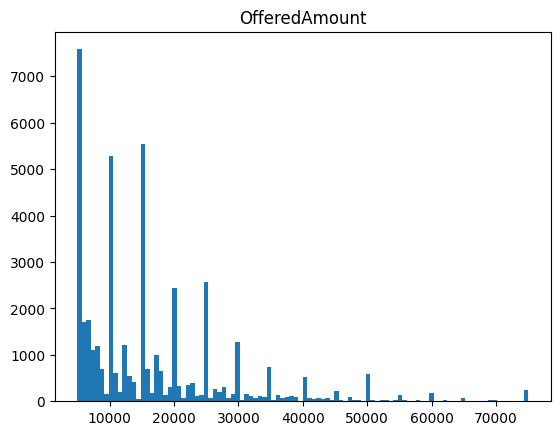

In [ ]:
for el in selected_num_columns.columns:
    fig = plt.figure()
    plt.title(f"{el}")
    plt.hist(selected_num_columns[el], bins=100)

# Random Forest Implementation

In [114]:
num_columns[["RequestedAmount", "OfferedAmount", "FirstWithdrawalAmount", "MonthlyCost", "NumberOfTerms"]].head()
cat_columns


,Accepted,Selected,LoanGoal,ApplicationType
0,NaN,NaN,"Other, see explanation",New credit
1,NaN,NaN,"Other, see explanation",New credit
2,NaN,NaN,"Other, see explanation",New credit
3,NaN,NaN,"Other, see explanation",New credit
4,True,False,"Other, see explanation",New credit
...,...,...,...,...
147719,NaN,NaN,Caravan / Camper,New credit
147720,True,True,Caravan / Camper,New credit
147721,NaN,NaN,Caravan / Camper,New credit
147722,True,True,Caravan / Camper,New credit


In [117]:
df_concatenated = pd.concat([cat_columns, num_columns[["RequestedAmount", "OfferedAmount", "FirstWithdrawalAmount", "MonthlyCost", "NumberOfTerms"]]], axis=1)
df_concatenated = df_concatenated.dropna()
print(df_concatenated)

       Accepted Selected                LoanGoal ApplicationType  \
4          True    False  Other, see explanation      New credit   
5          True    False  Other, see explanation      New credit   
6          True    False  Other, see explanation      New credit   
9          True    False  Other, see explanation      New credit   
15         True     True        Home improvement      New credit   
...         ...      ...                     ...             ...   
147715     True     True        Caravan / Camper      New credit   
147716     True     True        Caravan / Camper      New credit   
147717     True     True        Caravan / Camper      New credit   
147720     True     True        Caravan / Camper      New credit   
147722     True     True        Caravan / Camper      New credit   

        RequestedAmount  OfferedAmount  FirstWithdrawalAmount  MonthlyCost  \
4                5000.0         5000.0                 5000.0       241.28   
5                5000.0    

In [118]:
import numpy as np
y = df_concatenated['Selected']
y = np.array(y).astype(int)
y

array([0, 0, 0, ..., 1, 1, 1])

In [119]:
#df_concatenated.drop["Accepted", "Selected"]
x = df_concatenated.drop(["Accepted", "Selected", "LoanGoal", "ApplicationType"], axis=1)
x

,RequestedAmount,OfferedAmount,FirstWithdrawalAmount,MonthlyCost,NumberOfTerms
4,5000.0,5000.0,5000.0,241.28,22.0
5,5000.0,5000.0,5000.0,241.28,22.0
6,5000.0,5000.0,5000.0,241.28,22.0
9,5000.0,5000.0,5000.0,241.28,22.0
15,12500.0,12500.0,0.0,250.00,57.0
...,...,...,...,...,...
147715,30000.0,30000.0,30000.0,349.13,102.0
147716,30000.0,30000.0,30000.0,349.13,102.0
147717,30000.0,30000.0,30000.0,349.13,102.0
147720,30000.0,30000.0,30000.0,349.13,102.0


In [120]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0)
clf.fit(x, y)
RandomForestClassifier(random_state=0)
clf.predict(x)

array([0, 0, 0, ..., 0, 0, 0])

In [122]:
count = 0
accur = []
for i in clf.predict(x):
    if i == y[count]:
        accur.append(1)
    else:
        accur.append(0)
    count += 1

print(sum(accur) / len(accur))

0.8383919958723108


In [123]:
from sklearn.model_selection import cross_validate
result = cross_validate(clf, x, y)  # defaults to 5-fold CV
#result['test_score']  # r_squared 
result

{'fit_time': array([10.75381231, 10.77863884, 10.43078566, 10.13243842, 10.29632568]),
 'score_time': array([0.29713583, 0.36004496, 0.32213378, 0.30997348, 0.30149984]),
 'test_score': array([0.59454913, 0.61215792, 0.60998317, 0.61166573, 0.59831744])}